<a href="https://colab.research.google.com/github/NimeshMalhotra/Final-Project-Check/blob/main/Diabetes_Project_Final_Short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the onset of diabetes based on diagnostic measures


In [23]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

%matplotlib inline

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#For warning 
from warnings import filterwarnings
filterwarnings("ignore")

In [24]:
#Loading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/NimeshMalhotra/Project-Diabetes/main/diabetes.csv")

## Data Exploration

In [25]:
data.shape

(767, 9)

In [26]:
len(data)

767

In [27]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
data["Outcome"].value_counts()

0    499
1    268
Name: Outcome, dtype: int64

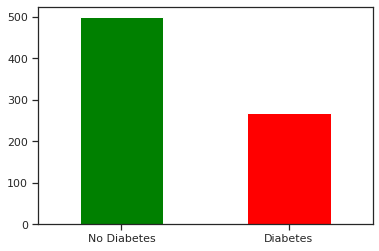

In [31]:
data["Outcome"].value_counts().plot(kind="bar",color=["green","red"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


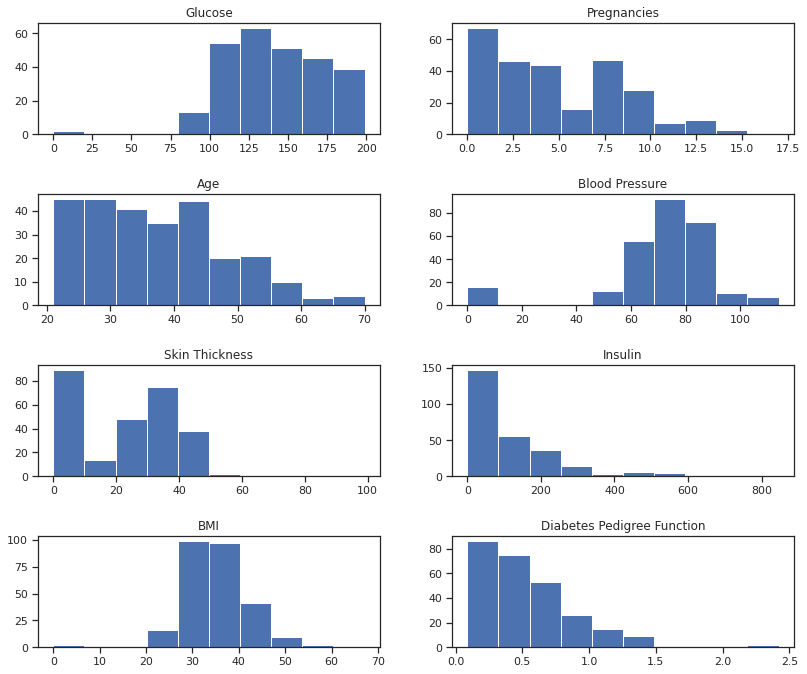

In [36]:
# Histogram of all coloumns when the Outcome is 1(Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

In [37]:
#corelation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128621,0.141399,-0.081009,-0.074356,0.017469,-0.034065,0.543904,0.221272
Glucose,0.128621,1.000000,0.152718,0.058120,0.330836,0.220957,0.136886,0.262783,0.466143
BloodPressure,0.141399,0.152718,1.000000,0.207390,0.089003,0.281825,0.041300,0.239699,0.065135
SkinThickness,-0.081009,0.058120,0.207390,1.000000,0.437635,0.392867,0.184412,-0.113312,0.075426
Insulin,-0.074356,0.330836,0.089003,0.437635,1.000000,0.197744,0.184728,-0.042985,0.129973
BMI,0.017469,0.220957,0.281825,0.392867,0.197744,1.000000,0.140546,0.036031,0.292612
DiabetesPedigreeFunction,-0.034065,0.136886,0.041300,0.184412,0.184728,0.140546,1.000000,0.033044,0.173478
Age,0.543904,0.262783,0.239699,-0.113312,-0.042985,0.036031,0.033044,1.000000,0.237725
Outcome,0.221272,0.466143,0.065135,0.075426,0.129973,0.292612,0.173478,0.237725,1.000000


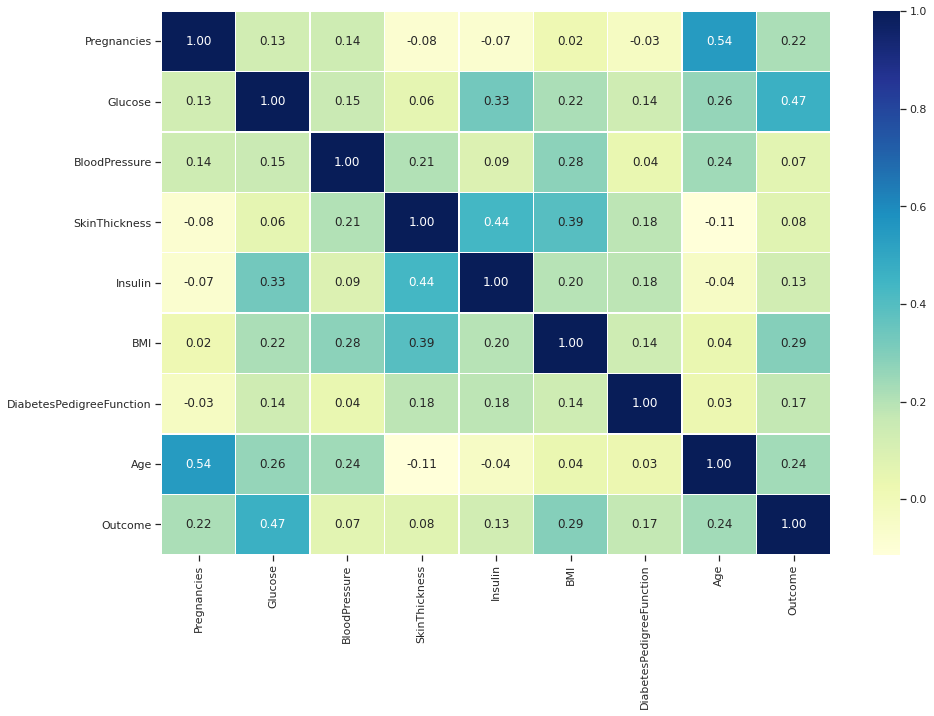

In [38]:
# make our correlation matrix visual
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# Modeling

In [39]:
#random data shuffelin
data.sample(frac=1)

#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,
                                              y,
                                              test_size=0.2)

In [40]:
(len(X_train),len(X_test))

(613, 154)

# Trying Different Models:

In [41]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

In [42]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [43]:
## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

In [44]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
svm = svm.score(X_test,y_test)

In [45]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

In [46]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.818182,0.772727,0.798701,0.818182


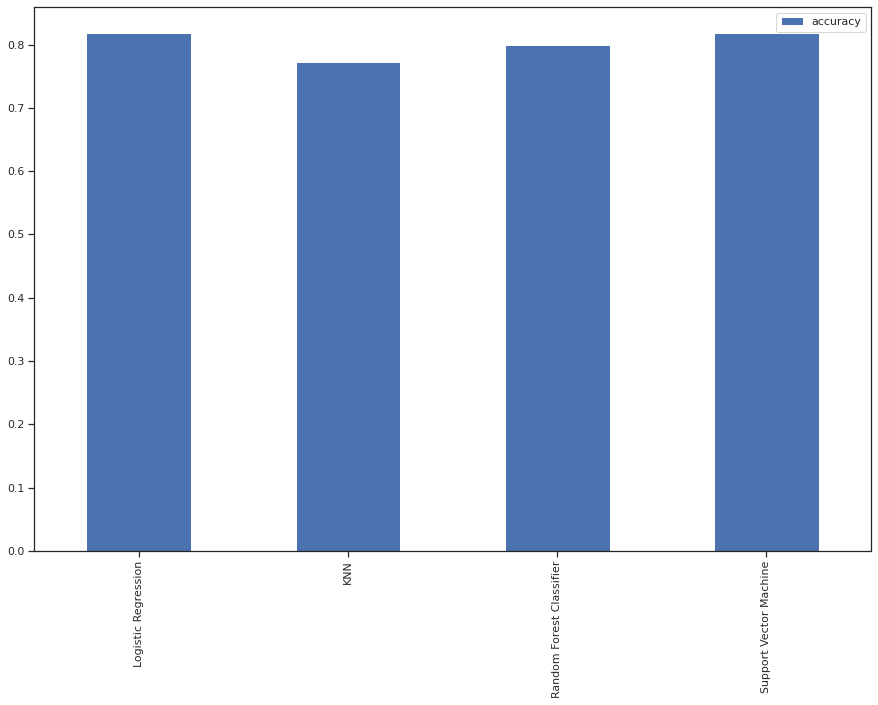

In [47]:
model_compare.T.plot.bar(figsize=(15,10));

## Hyperparameter tuning using RandomizedSearchcv


In [48]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


In [49]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [50]:
score = rs_log_reg.score(X_test,y_test)
score

0.8311688311688312

## Using Grid Search CV Logistic Regression

In [51]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid search cv
gs_log_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [52]:
gs_log_reg.score(X_test,y_test)

0.8376623376623377

# Best Model is logistic Regression with 83% accuracy

## Evaluating the tuned model by RandomizedSearchcv

In [53]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [54]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

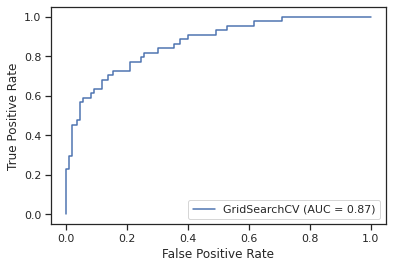

In [55]:
# plot ROC curve
plot_roc_curve(gs_log_reg,X_test,y_test)

In [56]:
#COnfusion matrix
print(confusion_matrix(y_test,y_preds))

[[104   6]
 [ 19  25]]


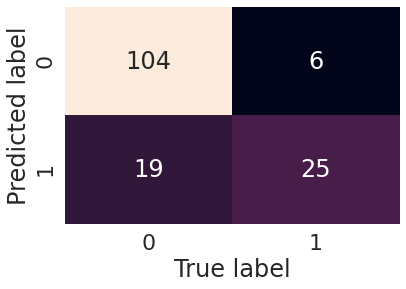

In [57]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       110
           1       0.81      0.57      0.67        44

    accuracy                           0.84       154
   macro avg       0.83      0.76      0.78       154
weighted avg       0.83      0.84      0.83       154



In [59]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [60]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [61]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([0.75324675, 0.75324675, 0.74025974, 0.71428571, 0.71428571,
       0.75324675, 0.76623377, 0.80263158, 0.71052632, 0.78947368])

In [62]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7497436773752563

In [63]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7142036215119739

In [64]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.48091168091168085

In [65]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.569372018074834

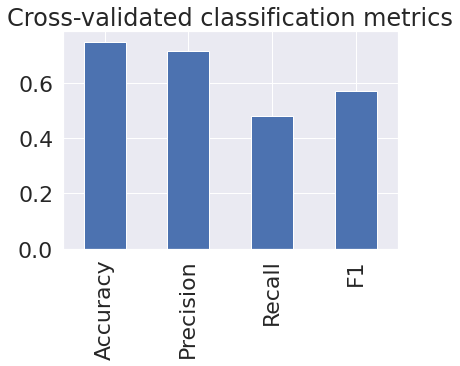

In [66]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [67]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [68]:
clf.coef_

array([[ 9.48703542e-02,  1.94837149e-02, -2.11706132e-02,
         1.58712385e-03, -2.09688196e-04,  2.43572383e-02,
         3.85642868e-01, -1.38905528e-03]])

In [69]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'Age': -0.0013890552757938072,
 'BMI': 0.02435723831827959,
 'BloodPressure': -0.021170613228680094,
 'DiabetesPedigreeFunction': 0.38564286771145,
 'Glucose': 0.01948371485616082,
 'Insulin': -0.00020968819555835163,
 'Pregnancies': 0.09487035423418436,
 'SkinThickness': 0.0015871238497038348}

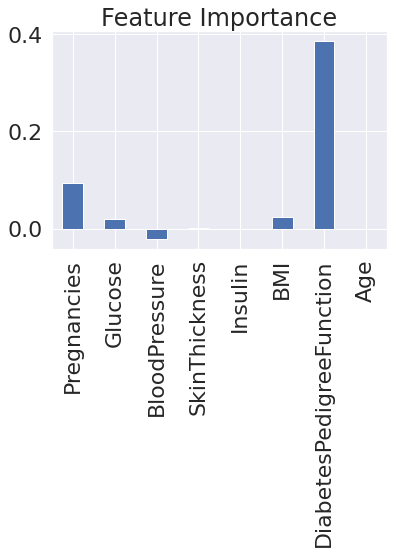

In [70]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# Loading and Saving a model

In [71]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))

In [72]:
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)


0.8376623376623377

# Predicting the Outcome Using New data

In [ ]:
## Enter the new data
X_test.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
20,3,126,88,41,235,39.3,0.704,27


In [ ]:
Pregnancies = input()
Glucose = input()
BloodPressure = input()
SkinThickness = input()
Insulin = input()
BMI = input()
DiabetesPedigreeFunction = input()
Age = input()

KeyboardInterrupt: ignored

In [ ]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI ,DiabetesPedigreeFunction ,Age])])

NameError: ignored

In [ ]:
row_df

In [ ]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

In [ ]:
loaded_model.predict(row_df)[0]
